In [ ]:
########################################################################
# Author    : A. Alsema
# Date      : May 2023
# Dataset   : Visium Spatial Transcriptomics for MS lesions
# Purpose   : plot heatmap corresponding to figure 1e, seurat clusters with average cell type proportions

# Required inputs:
# - seurat_metadata_with_cellprop.csv: table with estimated cell type proportions per spot, generated in script 0, 1
# - path_to_seurat_clusters: directory to seurat_metadata_with_cellprop.csv
# - outdir: path to store pfds

# Output: 
# - heatmap as pdf
#########################################################################

In [1]:
rm(list=ls())
library(dplyr)
library(tidyr)
library(ggplot2)

deconv_cluster_info <- read.csv(paste0(path_to_seurat_clusters, "seurat_metadata_with_cellprop.csv"))
head(deconv_cluster_info)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,X,ExNeurons,GM.astrocytes,InhNeurons,microglia.macrophages,Oligodendrocytes,OPCs,Vasculature,WM.astrocytes,res_ss,⋯,PMI_min,brain_pH,Group,percent.mito,percent.ribo,integrated_snn_res.0.3,seurat_clusters,ngenes_rate,integrated_snn_res.0.2,barcode
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<chr>
1,ST31_AAACAAGTATCTCCCA-1,0,0.0000000,0.0000000,0.0000000,0.4916877,0.0000000,0.1273714,0.3809408,0,⋯,345,6.38,CWM,8.290686,6.960082,1,0,-0.52670691,0,ST31_AAACAAGTATCTCCCA-1
2,ST31_AAACACCAATAACTGC-1,0,0.0000000,0.1628974,0.0000000,0.4066010,0.0000000,0.4305016,0.0000000,0,⋯,345,6.38,CWM,10.026212,10.157274,5,4,-0.22430454,4,ST31_AAACACCAATAACTGC-1
3,ST31_AAACAGAGCGACTCCT-1,0,0.0000000,0.0000000,0.0000000,0.5524707,0.0000000,0.2228127,0.2247166,0,⋯,345,6.38,CWM,12.896599,8.148824,1,0,1.05821620,0,ST31_AAACAGAGCGACTCCT-1
4,ST31_AAACAGCTTTCAGAAG-1,0,0.1229631,0.0000000,0.1249028,0.3388955,0.0000000,0.2143917,0.1988469,0,⋯,345,6.38,CWM,9.614621,8.184346,1,0,0.36137595,0,ST31_AAACAGCTTTCAGAAG-1
5,ST31_AAACAGGGTCTATATT-1,0,0.2001461,0.1106823,0.0000000,0.2248000,0.1042993,0.1459291,0.2141432,0,⋯,345,6.38,CWM,12.680950,8.222351,2,0,-0.06174832,0,ST31_AAACAGGGTCTATATT-1
6,ST31_AAACAGTGTTCCTGGG-1,0,0.0000000,0.0000000,0.1303810,0.4779928,0.0000000,0.1568175,0.2348087,0,⋯,345,6.38,CWM,7.974541,7.675028,1,0,0.42711559,0,ST31_AAACAGTGTTCCTGGG-1


In [2]:
df_heatmap = deconv_cluster_info %>%
    mutate(Neurons = ExNeurons + InhNeurons) %>%
    group_by(seurat_clusters) %>%
    summarise(
              avg_GM.astrocytes = mean(GM.astrocytes),
              avg_WM.astrocytes = mean(WM.astrocytes),
              avg_microglia.macrophages = mean(microglia.macrophages),
              avg_oligos = mean(Oligodendrocytes),
              avg_OPCs = mean(OPCs),
              avg_Neurons = mean(Neurons),
              avg_vasculature = mean(Vasculature)
              ) %>%
    gather(key = celltype, value = celltype.prop, 2:8)
df_heatmap

seurat_clusters,celltype,celltype.prop
<int>,<chr>,<dbl>
0,avg_GM.astrocytes,0.025271928
1,avg_GM.astrocytes,0.061257476
2,avg_GM.astrocytes,0.074671441
3,avg_GM.astrocytes,0.015777747
4,avg_GM.astrocytes,0.024822253
5,avg_GM.astrocytes,0.035912480
0,avg_WM.astrocytes,0.249886179
1,avg_WM.astrocytes,0.322563758
2,avg_WM.astrocytes,0.428663950


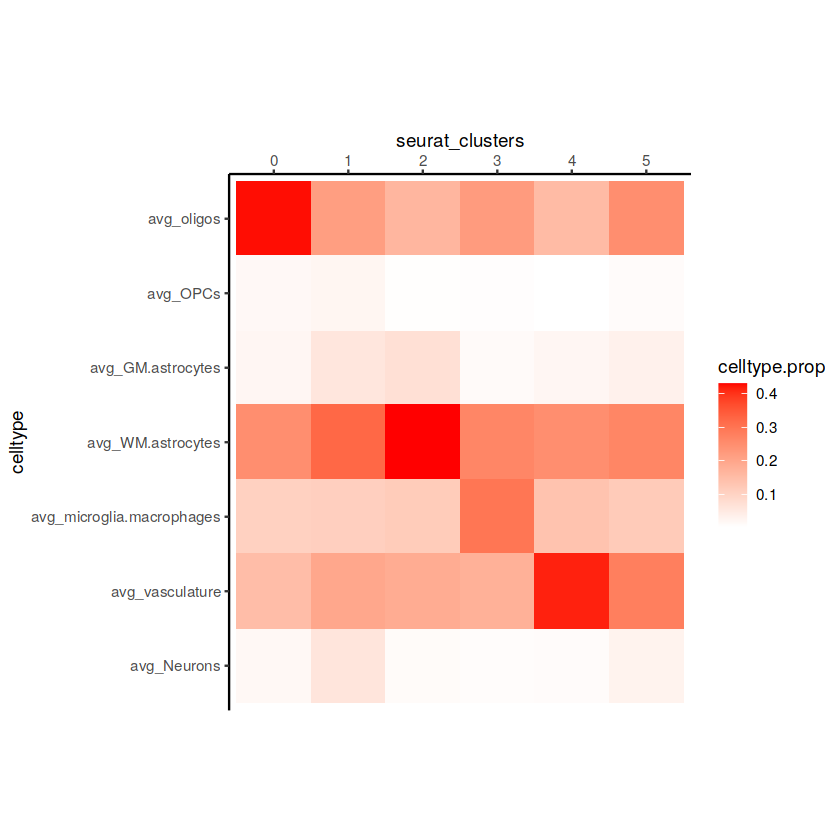

In [4]:
df_heatmap$seurat_clusters <- factor(df_heatmap$seurat_clusters, levels = unique(df_heatmap$seurat_clusters))
df_heatmap$celltype <- factor(df_heatmap$celltype, levels = rev(c("avg_oligos", "avg_OPCs", "avg_GM.astrocytes", "avg_WM.astrocytes",
                                                               "avg_microglia.macrophages", "avg_vasculature", "avg_Neurons")))

ggplot(df_heatmap, aes(seurat_clusters, celltype, fill= celltype.prop)) + 
  geom_tile() +
  scale_fill_gradient(low="white", high="red") +
  coord_equal() + scale_x_discrete(position = "top") +
  theme_classic()
    

In [5]:
pdf(paste0(outdir, "celltypeproportions_per_cluster_square.pdf"))
ggplot(df_heatmap, aes(seurat_clusters, celltype, fill= celltype.prop)) + 
  geom_tile() +
  scale_fill_gradient(low="white", high="red") +
  coord_equal() + scale_x_discrete(position = "top") +
  theme_classic()
dev.off()

pdf(paste0(outdir, "celltypeproportions_per_cluster_rectangle.pdf"))
ggplot(df_heatmap, aes(seurat_clusters, celltype, fill= celltype.prop)) + 
  geom_tile() +
  scale_fill_gradient(low="white", high="red") +
  coord_equal() + scale_x_discrete(position = "top") +
  theme_classic()
    
dev.off()

png 
  2

png 
  2